In [1]:
import time
import numpy as np
import pandas as pd

from SA.simulatedAnnealing import simulatedAnnealing
from problems.TSP.SimulatedAnnelingOperationsTSP import SimulatedAnnelingOperationsTSP as TSP

from utils.calculations import Point
from utils.manipulationFile import read_txt_file
import utils.cooling as alpha
from utils.graphics import create_plot, create_box_plots



In [6]:
def experiment(problem: str, path: str, num_interation: int, num_neighbors: int, SA_max: int, eq: int, TN: int, N: int) -> None:
    init = time.perf_counter()
    eq_dict = {
        0: alpha.cooling_schedule_0,
        1: alpha.cooling_schedule_1,
        2: alpha.cooling_schedule_2,
        3: alpha.cooling_schedule_3,
        4: alpha.cooling_schedule_4,
        5: alpha.cooling_schedule_5,
        6: alpha.cooling_schedule_6,
        7: alpha.cooling_schedule_7,
        8: alpha.cooling_schedule_8,
        9: alpha.cooling_schedule_9
    }
    
    solutions: list[int] = []
    
    dataset: dict = {}
    
    best_solution: int = 1_000_000
    best_list_interation: list[int]
    best_list_values: list[int]
    best_list_temperature: list[int]
    
    points: list[Point] = read_txt_file(path)

    tsp_t0: TSP = TSP(points)
    T0: float = tsp_t0.generate_T0_average(num_neighbors)
    
    for _ in range(0, num_interation):
        tsp: TSP = TSP(points)
        
        solution, list_interation, list_values, list_temperature = simulatedAnnealing(
            problem=tsp,
            alpha=eq_dict[eq],
            SA_max=1,
            T0=tsp.generate_T0_average(100),
            TN=0.001,
            N=N
        )
        
        solutions.append(solution.get_distance())
        
        print(solution.get_distance())
        
        if solution.get_distance() < best_solution:
            best_solution = solution.get_distance()
            best_list_interation = list_interation.copy()
            best_list_values = list_values.copy()
            best_list_temperature = list_temperature.copy()
    
    name: str = f"con-P{problem}-SA{SA_max}-EQ{eq}-N{N}-{time.time_ns()}.png"
    create_plot(
            title="Gráfico de Convergência do Simulated Anneling para TSP",
            xlabel="Interações",
            ylabel="Distância Percorrida",
            ax_label="Distância Percorrida",
            name=f"images/TSP/{name}",
            list_interation=best_list_interation,
            list_values=best_list_values,
            list_temperature=best_list_temperature,
            eq=eq
    )
    
    average = sum(solutions) / len(solutions)
    std = np.std(solutions)
    end = time.perf_counter()
            
    return problem, SA_max, eq, N, T0, best_solution, average, std, (end -init), name, solutions
    
    

1385.1026373670848
1359.2888901167796
1142.5745966347833
1293.9344723569861
1367.9412312984828
1293.208882667083
1358.2566867853302
1324.5480828068903
1256.3148774834328
1454.6833141052166


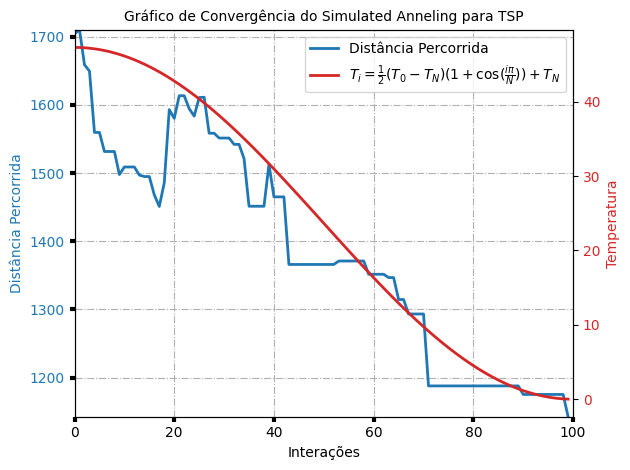

1263.8765907104864
1350.5570446779343
1401.9230785957338
1354.0601611949917
1341.7796845311432
1305.3249720493816
1375.3758632450947
1320.459640236571
1236.721054503838
1279.208175217425


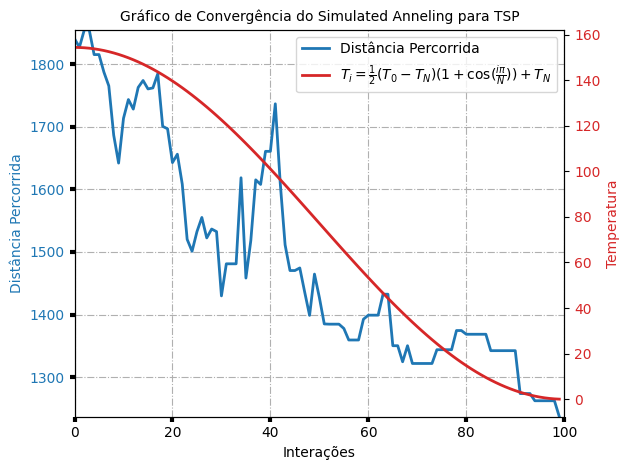

1227.1831877179081
1427.388896189727
1435.223878396134
1232.686806939571
1326.1968785277156
1390.5681437081203
1272.7331986654665
1273.450449513605
1300.9801366833178
1267.5317839216784


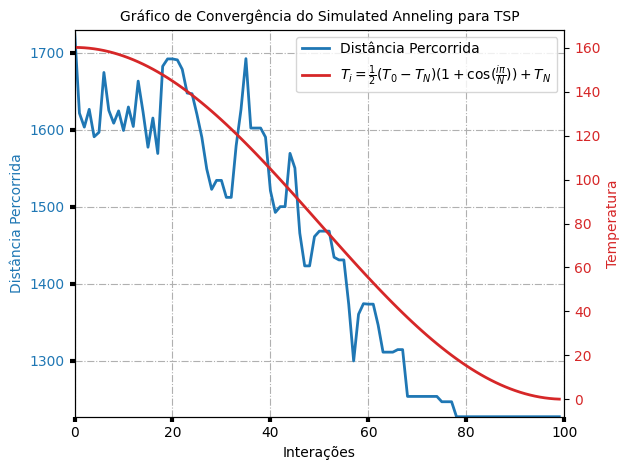

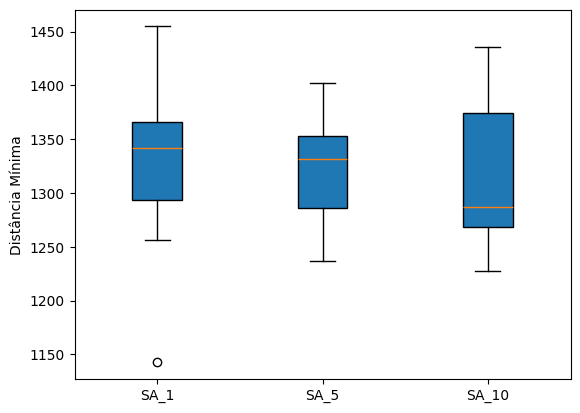

1117.47998180727
1293.7757514917096
1257.0335764439264
1175.5785750594923
1208.532286407283
1179.4193390641988
1175.355640305389
1284.8943700515244
1126.4244737319273
1179.8167422253275


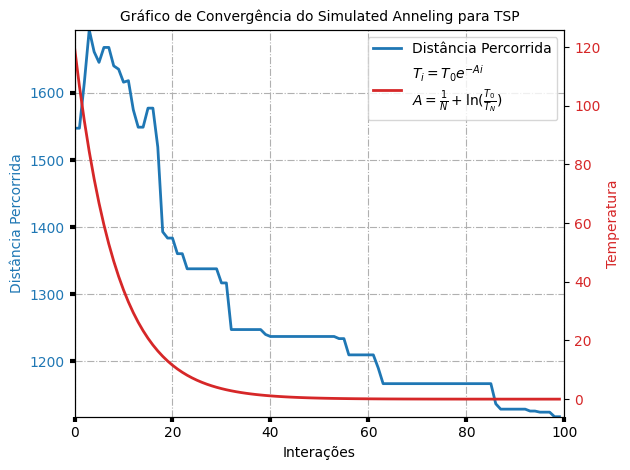

1234.1572427435249
1106.8961073251317
1247.0685436592644
1173.2009083761727
1270.2118902108414
1105.720577729341
1143.0312145944163
1162.524581360928
1197.3583958626773
1191.5833685816315


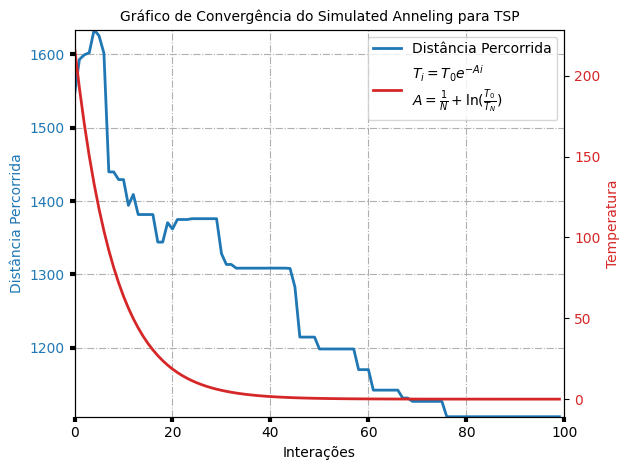

1267.8437353330376
1089.6145114053577
1240.2522557720918
1176.2711800370623
1153.7333033121115
1179.6618837277567
1124.8720267799476
1304.6868230270281
1211.7171263478529
1223.4404054857696


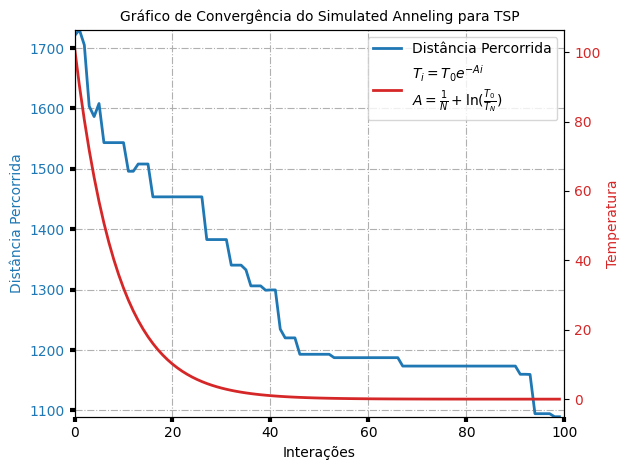

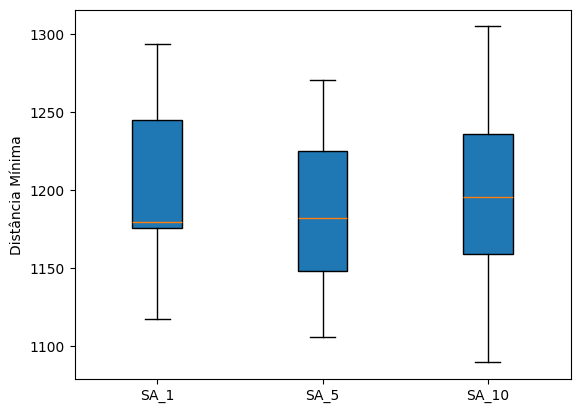

1195.3385303733717
1209.7962866500436
1269.3444386359863
1291.6052008657598
1181.1861005690082
1258.1791444570026
1204.4843633337994
1269.650325819494
1230.4841646004754
1286.1115067034239


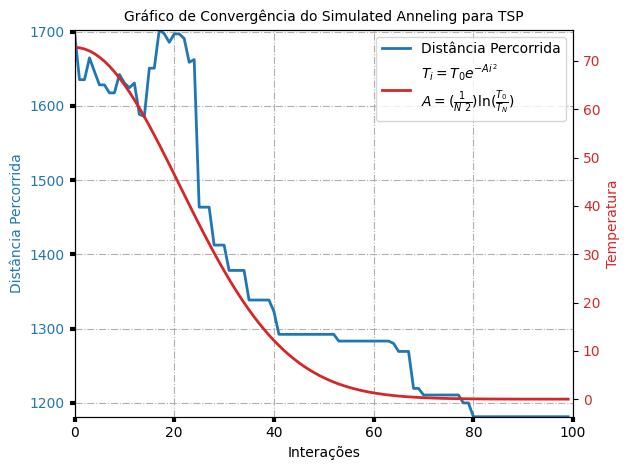

1261.8766902660166
1176.3823317494487
1230.2443224350652
1154.2775459013249
1195.4887070173547
1208.1611156500721
1297.7837644869387
1187.0425500611025
1188.56682654576
1210.3447388908241


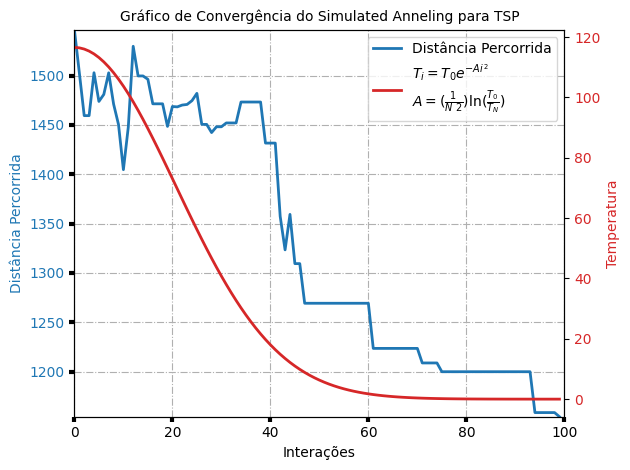

1269.3102262960235
1193.0070313556037
1239.3937562278338
1285.1778071831172
1055.5192754986826
1226.6653774806748
1169.0662665855812
1270.5046889257983
1187.2507220037617
1214.0257655853788


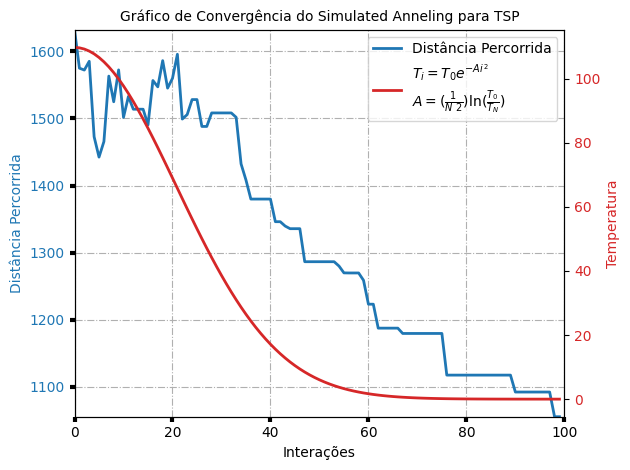

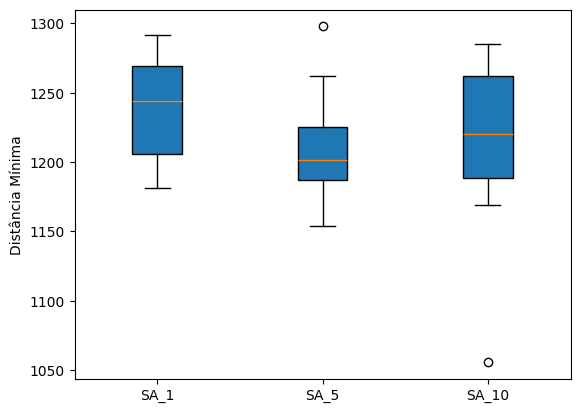

,Problema,SA_max,Equação,Número de Interações,Temperatura Inicial,Melhor Solução,Média,Desvio Padrão,Tempo (s),Imagem
0,TSP51,1,5,100,165.877367,1142.574597,1323.585367,80.317110,0.814648,con-PTSP51-SA1-EQ5-N100-1745440294650676873.png
1,TSP51,5,5,100,180.848024,1236.721055,1322.928626,49.218951,0.855882,con-PTSP51-SA5-EQ5-N100-1745440295328258342.png
2,TSP51,10,5,100,158.189111,1227.183188,1315.394336,73.054291,1.149216,con-PTSP51-SA10-EQ5-N100-1745440296387243111.png
3,TSP51,1,8,100,155.647395,1117.479982,1199.831074,57.951599,1.294843,con-PTSP51-SA1-EQ8-N100-1745440297807845137.png
4,TSP51,5,8,100,188.711615,1105.720578,1183.175283,53.370372,0.850564,con-PTSP51-SA5-EQ8-N100-1745440299049933635.png
5,TSP51,10,8,100,261.619181,1089.614511,1197.209325,62.239605,1.124755,con-PTSP51-SA10-EQ8-N100-1745440299988546352.png
6,TSP51,1,9,100,182.522868,1181.186101,1239.618006,38.179216,1.083038,con-PTSP51-SA1-EQ9-N100-1745440301419924407.png
7,TSP51,5,9,100,68.447777,1154.277546,1211.016859,40.289348,1.101179,con-PTSP51-SA5-EQ9-N100-1745440302462733613.png
8,TSP51,10,9,100,108.671934,1055.519275,1210.992092,63.501552,1.123414,con-PTSP51-SA10-EQ9-N100-1745440303637564472.png


In [12]:
d = {
    "Problema": [],
    "SA_max": [],
    "Equação": [],
    "Número de Interações": [],
    "Temperatura Inicial": [],
    "Melhor Solução": [],
    "Média": [],
    "Desvio Padrão": [],
    "Tempo (s)": [],
    "Imagem": []
}

N:int = 100

for eq in [5, 8, 9]:
    box_plots_list: list[list[int]] = []
    for sa in [1, 5, 10]:

        res = experiment(
            problem=p,
            path=PATH,
            num_interation=10,
            num_neighbors=100,
            SA_max=sa,
            eq=eq,
            TN=0.001,
            N=N
        )

        d["Problema"].append(res[0])
        d["SA_max"].append(res[1])
        d["Equação"].append(res[2])
        d["Número de Interações"].append(res[3])
        d["Temperatura Inicial"].append(res[4])
        d["Melhor Solução"].append(res[5])
        d["Média"].append(res[6])
        d["Desvio Padrão"].append(res[7])
        d["Tempo (s)"].append(res[8])
        d["Imagem"].append(res[9])
      
        box_plots_list.append(res[10])
        
    name: str = f"box-P{p}-SA{sa}-EQ{eq}-N{N}-{time.time_ns()}.png"

    create_box_plots(
        name=f"images/TSP/{name}",
        ylabel="Distância Mínima",
        labels=["SA_1", "SA_5", "SA_10"],
        weights=box_plots_list
    )

df = pd.DataFrame(d)
df.to_csv(f"logs/result-{p}-{time.time_ns()}.csv")
df

In [2]:
PATH: str = "samples/eil51.txt"
p: str = "TSP51"

Loading: 100%|██████████| 500000/500000 [03:34<00:00, 2334.40it/s]


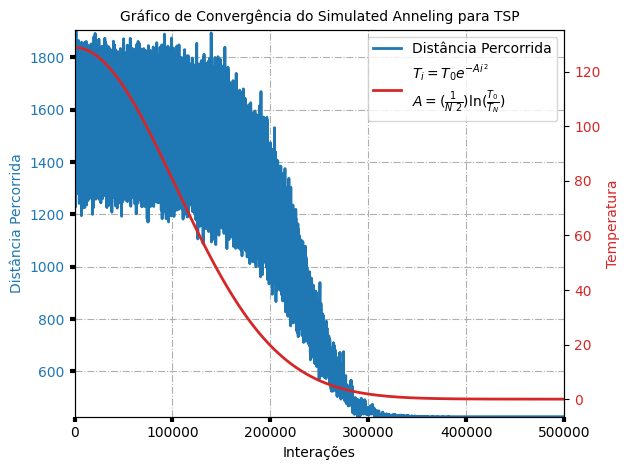

426.9605844754421

In [31]:
#  7, 
PATH: str = "samples/eil51.txt"

points: list[Point] = read_txt_file(PATH)

tsp: TSP = TSP(points, 1)

solution, list_interation, list_values, list_temperature = simulatedAnnealing(
    problem=tsp,
    alpha=alpha.cooling_schedule_9,
    SA_max=10,
    T0=tsp.generate_T0_average(100),
    TN=0.001,
    N=500_000
)

create_plot(
    title="Gráfico de Convergência do Simulated Anneling para TSP",
    xlabel="Interações",
    ylabel="Distância Percorrida",
    ax_label="Distância Percorrida",
    name="testeTSP.png",
    list_interation=list_interation,
    list_values=list_values,
    list_temperature=list_temperature,
    eq=9
)

solution.get_distance()

In [ ]:
# ponto ótimo 426 e 21282